# <center>**Bioseñales y sistemas**
## <center>**Proyecto procesamiento de señales EMG**
## <center>**Seguimiento 1**
#### Maria Alejandra Escobar - C.C 1004425012
#### Juan Manuel Martínez - C.C 1007739919

In [2]:
import scipy.io as sio
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

## Punto 0 
Vamos motivados, esto está fácil

In [3]:
import os
import glob
ruta_p = 'EMG_data_for_gestures-master'
i = 0
diccionario_3d = {} 
for carpeta in os.listdir(ruta_p):
    i+=1
    carpeta_path = os.path.join(ruta_p, carpeta)
    archivos = glob.glob(os.path.join(carpeta_path, '*'))
    if len(archivos)>0:
        primer_archivo = archivos[0]
        df = pd.read_csv(primer_archivo, delimiter="\t")
        diccionario_3d[i] = df

## Punto 1
Funcion que aplica TKEO a un solo canal

In [4]:
def tkeo(a):
	a = np.array(a)
	i = a[1:-1]*a[1:-1]
	j = a[2:]*a[:-2]
	aTkeo = i-j
	return aTkeo

## Punto 2 
Funcion que aplica TKEO a multiples canales 

In [5]:
def tkeo_multiple(n_canal,df):
    res_canales = np.zeros((len(df)-2, n_canal))
    canales = ['channel1', 'channel2', 'channel3','channel4','channel5','channel6','channel7','channel8']
    for i in np.arange(1,n_canal+1):
        arreglo = np.array(df[f'channel{i}'])
        ar_tkeo = tkeo(arreglo)
        res_canales[:, i-1] = ar_tkeo
    df_tkeo = pd.DataFrame(res_canales, columns=canales)
    return df_tkeo

## Punto 3 
Calcular las variables estadisticas del diccionario sin TKEO

In [6]:
def calcularRMS(X):
  N=X.size #Cantidad de puntos
  rms=(np.sum(X**(2))/N)**0.5
  return rms

In [7]:
def var_est(n_canal, df):
    res_canales_list = []
    estadisticas = ['class','C_1RMS', 'C_1Var', 'C_1MAV', 'C_1MAVS', 'C_1SSC', 'C_1WL', 'C_1ZC',
                    'C_2RMS', 'C_2Var', 'C_2MAV', 'C_2MAVS', 'C_2SSC', 'C_2WL', 'C_2ZC',
                    'C_3RMS', 'C_3Var', 'C_3MAV', 'C_3MAVS', 'C_3SSC', 'C_3WL', 'C_3ZC',
                    'C_4RMS', 'C_4Var', 'C_4MAV', 'C_4MAVS', 'C_4SSC', 'C_4WL', 'C_4ZC',
                    'C_5RMS', 'C_5Var', 'C_5MAV', 'C_5MAVS', 'C_5SSC', 'C_5WL', 'C_5ZC',
                    'C_6RMS', 'C_6Var', 'C_6MAV', 'C_6MAVS', 'C_6SSC', 'C_6WL', 'C_6ZC',
                    'C_7RMS', 'C_7Var', 'C_7MAV', 'C_7MAVS', 'C_7SSC', 'C_7WL', 'C_7ZC',
                    'C_8RMS', 'C_8Var', 'C_8MAV', 'C_8MAVS', 'C_8SSC', 'C_8WL', 'C_8ZC']
    clase = []
    for i in range(8):
        clase = [i]
        lista_move = [] 
        df_p1 = df[df['class'] == i] 
        for j in range(1, n_canal + 1):
            arreglo = np.array(df_p1[f'channel{j}'])
            rms = calcularRMS(arreglo)
            var = np.var(arreglo)
            mean = np.mean(np.abs(arreglo))
            mean_slope = np.mean(np.abs(np.diff(arreglo)))
            sl_sign_c = np.sum(np.abs(np.diff(np.sign(np.diff(arreglo)))))
            wl_values = np.sum(np.abs(np.diff(arreglo)))
            zero_crossings = np.sum(np.diff(np.sign(arreglo)))
            lista = [rms, var, mean, mean_slope, sl_sign_c, wl_values, zero_crossings]
            lista_move.extend(lista)
        
        clase.extend(lista_move)        
        res_canales_list.append(clase)
        
    df_estadisticas = pd.DataFrame(res_canales_list, columns=estadisticas)
    return df_estadisticas

## Punto 4
Se modifico la funcion anterior para aplicar la transformacion TKEO en la funcion y obtener las variables estadisticas habiendo aplicado la transformacion TKEO

In [8]:
def var_est_con_TKEO(n_canal, df):
    res_canales_list = []
    estadisticas = ['class','C_1RMS', 'C_1Var', 'C_1MAV', 'C_1MAVS', 'C_1SSC', 'C_1WL', 'C_1ZC',
                    'C_2RMS', 'C_2Var', 'C_2MAV', 'C_2MAVS', 'C_2SSC', 'C_2WL', 'C_2ZC',
                    'C_3RMS', 'C_3Var', 'C_3MAV', 'C_3MAVS', 'C_3SSC', 'C_3WL', 'C_3ZC',
                    'C_4RMS', 'C_4Var', 'C_4MAV', 'C_4MAVS', 'C_4SSC', 'C_4WL', 'C_4ZC',
                    'C_5RMS', 'C_5Var', 'C_5MAV', 'C_5MAVS', 'C_5SSC', 'C_5WL', 'C_5ZC',
                    'C_6RMS', 'C_6Var', 'C_6MAV', 'C_6MAVS', 'C_6SSC', 'C_6WL', 'C_6ZC',
                    'C_7RMS', 'C_7Var', 'C_7MAV', 'C_7MAVS', 'C_7SSC', 'C_7WL', 'C_7ZC',
                    'C_8RMS', 'C_8Var', 'C_8MAV', 'C_8MAVS', 'C_8SSC', 'C_8WL', 'C_8ZC']
    clase = []
    for i in range(8):
        clase = [i]
        lista_move = [] 
        df_p1 = df[df['class'] == i] 
        if len(df_p1>0):
            df_p1 = tkeo_multiple(8,df_p1)
        for j in range(1, n_canal + 1):
            arreglo = np.array(df_p1[f'channel{j}'])
            rms = calcularRMS(arreglo)
            var = np.var(arreglo)
            mean = np.mean(np.abs(arreglo))
            mean_slope = np.mean(np.abs(np.diff(arreglo)))
            sl_sign_c = np.sum(np.abs(np.diff(np.sign(np.diff(arreglo)))))
            wl_values = np.sum(np.abs(np.diff(arreglo)))
            zero_crossings = np.sum(np.diff(np.sign(arreglo)))
            lista = [rms, var, mean, mean_slope, sl_sign_c, wl_values, zero_crossings]
            lista_move.extend(lista)
        
        clase.extend(lista_move)        
        res_canales_list.append(clase)
        
    df_estadisticas = pd.DataFrame(res_canales_list, columns=estadisticas)
    return df_estadisticas

Vamos a hacer un diccionario donde la clave sea el paciente y el valor sea un DF que incluya los 8 canales de cada paciente aplicando el TKEO.

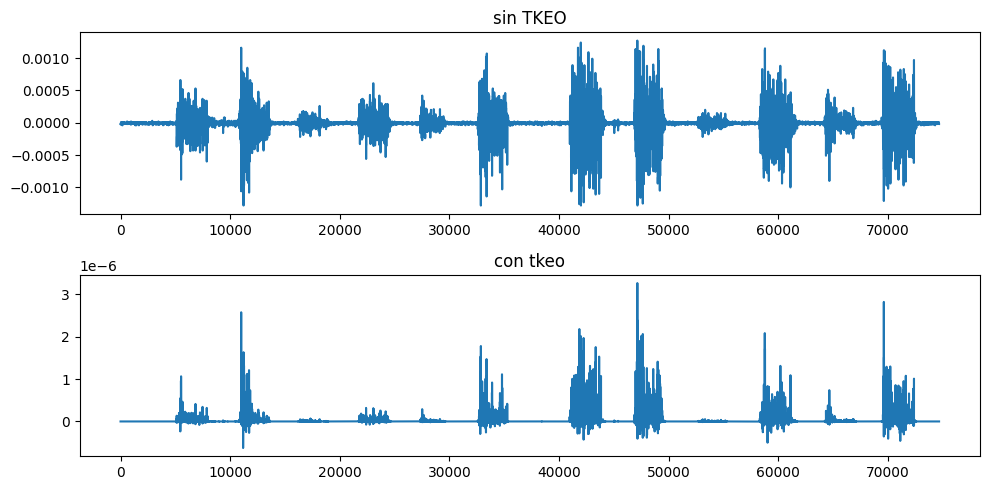

In [9]:
diccionario_Tkeo = {}
i = 0
for pac in diccionario_3d.values():
    i+=1
    diccionario_Tkeo[f'P{i}'] = tkeo_multiple(8,pac)

t = np.arange(0,len(diccionario_3d[11]['channel1']))
t_tkeo = np.arange(0,len(diccionario_Tkeo['P11']['channel1']))
ejemplo_comp_Tkeo = plt.figure(figsize=(10, 5))
    
plt.subplot(2, 1, 1)
plt.plot(t, diccionario_3d[11]['channel1'])
plt.title('sin TKEO')

plt.subplot(2, 1, 2)
plt.plot(t_tkeo, diccionario_Tkeo['P11']['channel1'])
plt.title('con tkeo')

plt.tight_layout()

In [10]:
i = 0
df_final_conTkeo = pd.DataFrame()
for pac in diccionario_3d.values():
    i+=1
    df_np = pd.DataFrame({'Sujeto': (np.ones(8, dtype=int))* i,'class': np.arange(0, 8)})   
    df_tkeo = pd.DataFrame({'Tkeo': np.ones(8, dtype=int),'class': np.arange(0, 8)}) 
    df_final = var_est_con_TKEO(8,pac)
    
    df_final = pd.merge(df_np, df_final, how = 'left', on = 'class')
    df_final = pd.merge(df_final, df_tkeo, how = 'left', on = 'class')
    
    #df_final.append(df_final_Tkeo)
    df_final_conTkeo = pd.concat([df_final_conTkeo,df_final],axis=0)
    df_final_conTkeo = df_final_conTkeo.fillna(0)

C:\Users\Juan Manuel\AppData\Local\Temp\ipykernel_9284\2966749409.py:3: RuntimeWarning: invalid value encountered in scalar divide
  rms=(np.sum(X**(2))/N)**0.5
C:\Users\Juan Manuel\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\core\fromnumeric.py:3787: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\Juan Manuel\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\core\_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
C:\Users\Juan Manuel\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\core\_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rc

## Punto 5
DataFrame sin Tkeo

In [ ]:
i = 0
df_final_sinTkeo = pd.DataFrame()
for pac in diccionario_3d.values():
    i+=1
    df_np = pd.DataFrame({'Sujeto': (np.ones(8, dtype=int))* i,'class': np.arange(0, 8)})   
    df_tkeo = pd.DataFrame({'Tkeo': np.zeros(8, dtype=int),'class': np.arange(0, 8)}) 
    df_final = var_est(8,pac)
    df_final = pd.merge(df_np, df_final, how = 'left', on = 'class')
    df_final = pd.merge(df_final, df_tkeo, how = 'left', on = 'class')
    
    #df_final.append(df_final_Tkeo)
    df_final_sinTkeo = pd.concat([df_final_sinTkeo,df_final],axis=0)
    df_final_sinTkeo = df_final_sinTkeo.fillna(0)

## Punto 6 
DataFrame final final

In [12]:
df_completo = pd.concat([df_final_sinTkeo,df_final_conTkeo],axis=0)

Funciones para análisis estadístico

In [36]:
def normalidad_datos(data):
  #Función que aplica la prueba Shapiro-Wilks sobre un conjunto de datos.
  #H0:Los datos provienen de una distribución normal.
  #H1: Los datos no provienen de una distribución normal.
  #Intervalo de confianza de 95%.
  alpha=0.05
  resultados_data = []
  for columna in data:
    if columna != 'Estado':
      _, valor_normal = stats.shapiro(data[columna])
      if valor_normal<alpha:
        resultado='Rechazo H0, no distribuye normal'
      else:
        resultado='Acepto H0, distribuye normal'

      resultados_data.append({
            'Canal': columna,
            'Valor p': valor_normal,
            'Resultado': resultado})

  resultados_df = pd.DataFrame(resultados_data)
  return resultados_df

def homocedasticidad_datos(data,data1):
  #Función que aplica la prueba Levene sobre pares de datos.
  #H0:Los datos presentan hocedasticidad.
  #H1: Los datos no presentan hocedasticidad.
  #Intervalo de confianza de 95%.
  alpha=0.05
  resultados_data = []
  for columna in data:
    if columna != 'Estado':
      valor_levene, valor_critico = stats.levene(data[columna],data1[columna])
      if valor_levene < alpha:
        resultado='Se rechaza H0, hay heterocedasticidad'
      else:
        resultado='Se acepta H0, hay homocedasticidad'

      resultados_data.append({
            'Canal': columna,
            'Valor p': valor_levene,
            'Resultado': resultado})

  resultados_df = pd.DataFrame(resultados_data)
  return resultados_df

def prueba_MannW (dataC,dataP):
  #Función que aplica la prueba t-student sobre pares de datos.
  #H0:La media de los dos grupos es igual.
  #H1:La media de los dos grupos no es igual.
  #Intervalo de confianza de 95%.
  alpha=0.05
  resultados_data = []
  for columns in dataC:
    if columns != 'Estado':
      _ , p_value =stats.mannwhitneyu(dataC[columns],dataP[columns])

      if p_value < alpha:
        resultado='Se rechaza H0, la media es diferente.'
      else:
        resultado='Se acepta H0, la media es igual'

      resultados_data.append({
            'Canal': columns,
            'Valor p': p_value,
            'Resultado': resultado})

  resultados_df = pd.DataFrame(resultados_data)
  return resultados_df

In [30]:

columnas_deseadas = ['C_1RMS', 'C_2RMS', 'C_3RMS', 'C_4RMS','C_5RMS', 'C_6RMS', 'C_7RMS', 'C_8RMS']

# Usando loc para seleccionar las columnas por nombre

sujeto_mov3_sinTkeo = df_final_sinTkeo[df_final_sinTkeo['class']==3]


sujeto_mov3_conTkeo = df_final_conTkeo[df_final_sinTkeo['class']==3]

sujeto_mov3_sinTkeo = sujeto_mov3_sinTkeo.loc[:, columnas_deseadas]
sujeto_mov3_conTkeo = sujeto_mov3_conTkeo.loc[:, columnas_deseadas]


## INFORME

### Introduccion 
La recolección de datos destinada a la elaboración de señales biomédicas está adquiriendo una creciente relevancia en el ámbito de la bioingeniería. Esto se debe a que dichas señales desempeñan un papel fundamental en la comprensión y el diagnóstico de una amplia variedad de condiciones médicas. En este contexto, la electromiografía (EMG) emerge como una herramienta esencial para la medición de la actividad eléctrica de los músculos y la comprensión de su funcionamiento.

El presente estudio se centra en la adquisición de EMG a ttavés de ocho canales en el antebrazo, con el objetivo de identificar gestos realizados con las manos. Para lograr este propósito, se propone la utilización del operador TKEO (Teager-Kaiser Energy operator en inglés) para el estudio de dichas señales. Además, se llevará a cabo un análisis estadístico descriptivo del comportamiento de los datos obtenidos de los participantes.

### Electromiografía
La electromiografía (EMG) es una técnica que permite registrar la actividad eléctrica generada por los músculos durante su contracción y relajación. Esta señal eléctrica se conoce como señal electromiográfica y presenta características específicas que la diferencian de otras señales bioeléctricas. Las principales características de una señal electromiografía son:

**Amplitud:** La amplitud de la señal EMG oscila típicamente entre 0 y 10 mV, dependiendo de la fuerza de contracción muscular y la distancia entre los electrodos y las fibras musculares activas.

**Frecuencia:** El rango de frecuencias de la señal EMG se encuentra típicamente entre 20 y 500 Hz, con la mayor parte de la energía concentrada entre 50 y 150 Hz.

**Naturaleza estocástica:** La señal EMG es una señal aleatoria y no periódica, ya que representa la suma de los potenciales de acción de las unidades motoras activas en un músculo.
Dependencia de la fuerza: La amplitud y la frecuencia de la señal EMG aumentan con la fuerza de contracción muscular.

**Interferencia:** La señal EMG puede verse afectada por ruido e interferencias de fuentes externas, como otros dispositivos eléctricos o la actividad de otros músculos cercanos [1].

### Operador TKEO
El operador de TKEO (Teager-Kaiser Energy Operator) es una herramienta ampliamente utilizada en el análisis de señales bioeléctricas, como la señal electromiográfica. El operador de TKEO es un operador no lineal que proporciona una estimación de la energía instantánea de una señal [2].

En el caso de la señal electromiográfica, el operador de TKEO resalta las componentes de alta frecuencia y amplitud de la señal. La interpretación de los valores del operador de TKEO se basa en la idea de que valores altos indican una mayor actividad muscular en ese instante de tiempo. Por lo tanto, los picos y las áreas con valores elevados del operador de TKEO pueden utilizarse para detectar y analizar las contracciones musculares en la señal electromiográfica.

**[1]** Merletti, R., & Parker, P. J. (Eds.). (2004). Electromyography: physiology, engineering, and non-invasive applications (Vol. 11). John Wiley & Sons.

**[2]** Solnik, S., Rider, P., Steinweg, K., DeVita, P., & Hortobágyi, T. (2010). Teager–Kaiser energy operator signal conditioning improves EMG onset detection. European journal of applied physiology, 110, 489-498.

## Metodología
El proceso de procesamiento de las señales EMG comenzó con la carga de los datos. Inicialmente, se realizó una exploración manual para entender la estructura de los datos descargados. En esta etapa, se descubrió que cada paciente contaba con dos conjuntos de datos correspondientes a dos días diferentes en los que se registraron las señales EMG. Por tanto, fue necesario seleccionar uno de los archivos y excluir los demás durante la lectura.

Tras analizar ambas bases de datos, se decidió elegir el primer conjunto de datos de todos los pacientes debido a su mayor cantidad de registros. A continuación, se aplicó la función TKEO a cada uno de los canales presentes en los 36 sujetos.

A partir de este punto, se obtuvieron dos grupos de datos: los datos originales y los datos transformados. De estos grupos se extrajeron 5 medidas: valor RMS, varianza, valor absoluto medio (Mean Absolute Value), pendiente del valor absoluto medio (Mean Absolute Value Slope), cambios de signo de la pendiente (Slope Sign Changes), longitud de la forma de onda (Waveform Length) y cruces por cero (Zero Crossing). Estas medidas son variables cruciales para realizar comparaciones en el comportamiento entre diferentes tipos de señales.

Toda esta información se organizó en un formato de DataFrame, donde se puede identificar, a través de una columna, el tipo de movimiento (clase) y si los datos corresponden a la señal original o transformada.

In [14]:
df_completo

,Sujeto,class,C_1RMS,C_1Var,C_1MAV,C_1MAVS,C_1SSC,C_1WL,C_1ZC,C_2RMS,...,C_7WL,C_7ZC,C_8RMS,C_8Var,C_8MAV,C_8MAVS,C_8SSC,C_8WL,C_8ZC,Tkeo
0,1,0,1.377077e-04,1.892634e-08,6.183127e-05,9.694459e-06,7234.0,0.400100,-2.0,1.291164e-04,...,0.404770,-1.0,1.450801e-04,2.101997e-08,6.680704e-05,1.028640e-05,7136.0,0.424530,0.0,0
1,1,1,1.700840e-05,2.018286e-10,1.269577e-05,1.526859e-06,570.0,0.005770,0.0,2.842795e-05,...,0.005010,1.0,1.445299e-05,1.289331e-10,1.123810e-05,1.320455e-06,563.0,0.004990,-1.0,0
2,1,2,2.230812e-04,4.963748e-08,1.715007e-04,2.699205e-05,657.0,0.095120,0.0,1.145002e-04,...,0.087070,0.0,1.588650e-04,2.516906e-08,1.214270e-04,1.840806e-05,639.0,0.064870,0.0,0
3,1,3,1.847610e-04,3.382781e-08,1.405503e-04,1.931586e-05,668.0,0.073690,2.0,2.265797e-04,...,0.030850,0.0,1.596455e-04,2.533018e-08,1.253931e-04,1.691743e-05,656.0,0.064540,2.0,0
4,1,4,5.179992e-05,2.604975e-09,3.980238e-05,5.665698e-06,612.0,0.019490,0.0,8.386064e-05,...,0.042680,0.0,7.332395e-05,5.244896e-09,5.623365e-05,7.906977e-06,616.0,0.027200,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3,36,3,3.769563e-08,1.370799e-15,8.201657e-09,1.216178e-08,1127.0,0.000037,1.0,1.175364e-08,...,0.000007,1.0,6.609162e-09,4.178659e-17,1.560136e-09,2.191518e-09,1107.0,0.000007,1.0,1
4,36,4,1.852621e-09,3.293449e-18,4.318598e-10,6.233733e-10,1149.0,0.000002,0.0,2.767671e-09,...,0.000005,0.0,1.906538e-09,3.457117e-18,4.785917e-10,7.029690e-10,1157.0,0.000002,0.0,1
5,36,5,2.280261e-08,4.974427e-16,5.432824e-09,7.918550e-09,1076.0,0.000022,0.0,2.196109e-08,...,0.000001,0.0,1.254977e-09,1.517179e-18,2.860036e-10,4.316986e-10,998.0,0.000001,0.0,1
6,36,6,1.185381e-08,1.355347e-16,2.518608e-09,3.758293e-09,1106.0,0.000011,-1.0,3.691752e-09,...,0.000010,-1.0,1.846080e-08,3.279815e-16,3.996677e-09,5.762141e-09,1118.0,0.000016,-1.0,1


## Resultados
Para el estudio exploratorio de los datos, se realizaron gráficos de caja y bigote, con el propósito de identificar valores atípicos, comprender la dispersión y visualizar la simetría de los datos. Estos gráficos se estudiaron bajo una de las variables ya mencionadas que fue el RMS. Esto se hizo porque el valor RMS da indicios de la energía total que almacena la señal. Traducido al EMG, puede dar indicios de activación muscular en los puntos de medición. 

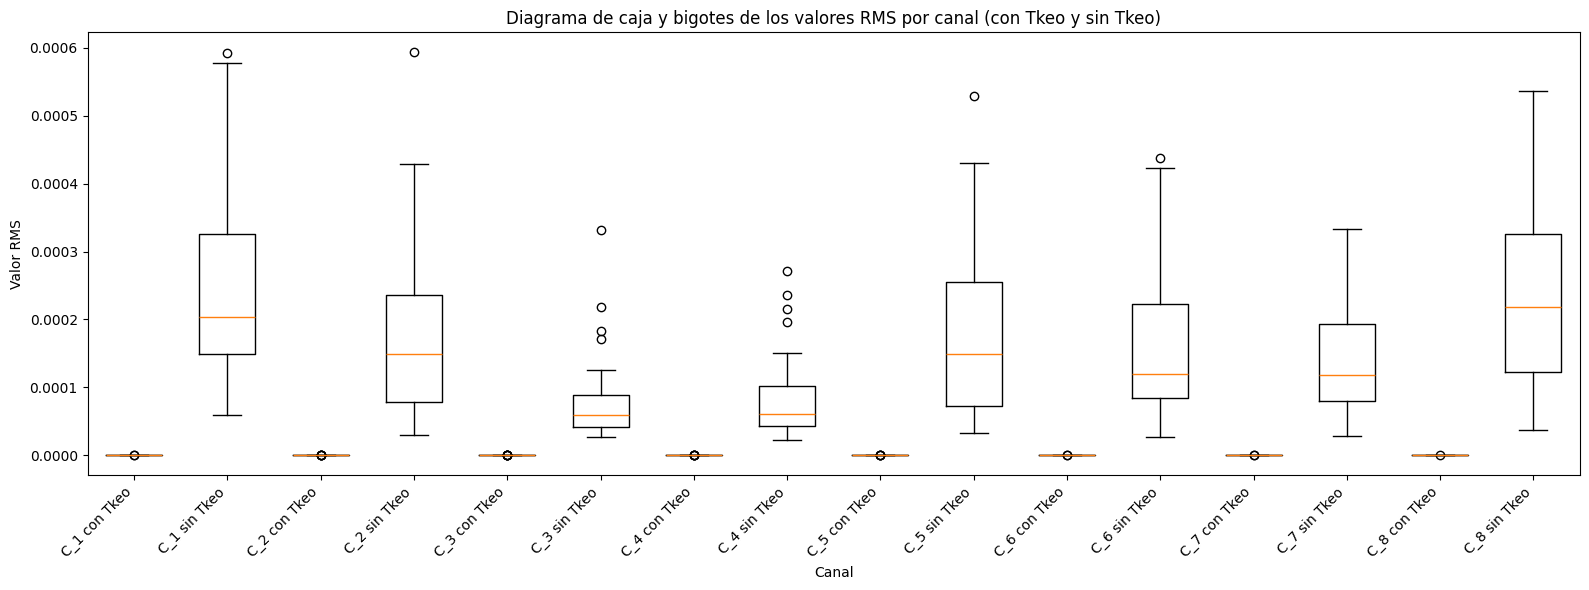

In [18]:
#Dataframe con valores de rms con Tkeo del movimiento 3 (flexión de muñeca)

df_final_conTkeo_m3 = df_final_conTkeo[df_final_conTkeo['class']==3]

##Dataframe con valores de rms sin Tkeo del movimiento 3 (flexión de muñeca)

df_final_sinTkeo_m3 = df_final_sinTkeo[df_final_sinTkeo['class']==3]

# Etiquetas de los canales
canales = [f'C_{i}' for i in range(1, 9)]

# Datos con Tkeo y sin Tkeo
datos_contkeo = []
datos_sintkeo = []

# Iterar sobre los números del 1 al 8 (utilizando np.arange(1, 9))
for i in np.arange(1, 9):
    # Obtener la lista de valores de la columna 'C_{i}RMS' del DataFrame df_final_conTkeo_cl1
    lista_RMS_contkeo = list(df_final_conTkeo_m3[f'C_{i}RMS'])
    datos_contkeo.append(lista_RMS_contkeo)

    # Obtener la lista de valores de la columna 'C_{i}RMS' del DataFrame df_final_sinTkeo_cl1
    lista_RMS_sintkeo = list(df_final_sinTkeo_m3[f'C_{i}RMS'])
    datos_sintkeo.append(lista_RMS_sintkeo)

# Listas para almacenar los datos intercalados y las etiquetas intercaladas
datos_intercalados = []
etiquetas_intercaladas = []

# Intercalar los datos con Tkeo y sin Tkeo para cada canal
for i, canal in enumerate(canales):
    datos_intercalados.extend([datos_contkeo[i], datos_sintkeo[i]])
    etiquetas_intercaladas.extend([f'{canal} con Tkeo', f'{canal} sin Tkeo'])

# Posiciones para los boxplots
posiciones = np.arange(1, len(canales) * 2 + 1)

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(16, 6))

# Graficar los boxplots
bplot1 = ax.boxplot(datos_intercalados, positions=posiciones, widths=0.6)

# Añadir etiquetas
ax.set_xticks(posiciones)
ax.set_xticklabels(etiquetas_intercaladas, rotation=45, ha='right')

# Añadir títulos
ax.set_title('Diagrama de caja y bigotes de los valores RMS por canal (con Tkeo y sin Tkeo)')
ax.set_xlabel('Canal')
ax.set_ylabel('Valor RMS')

# Mostrar la gráfica
plt.tight_layout()
plt.show()

Se graficó este movimiento como ejemplo, en el que se compararon cada uno de los canales transformados con TKEO y con los datos originales, sin embargo se evidenció que ambos datos no eran comparables en magnitud si se graficaban los dos en un mismo eje, ya que los resultados con TKEO tienen magnitudes mucho más pequeñas que los originales, lo que hace que los ´rimeros no se aprecien en el gráfico. 

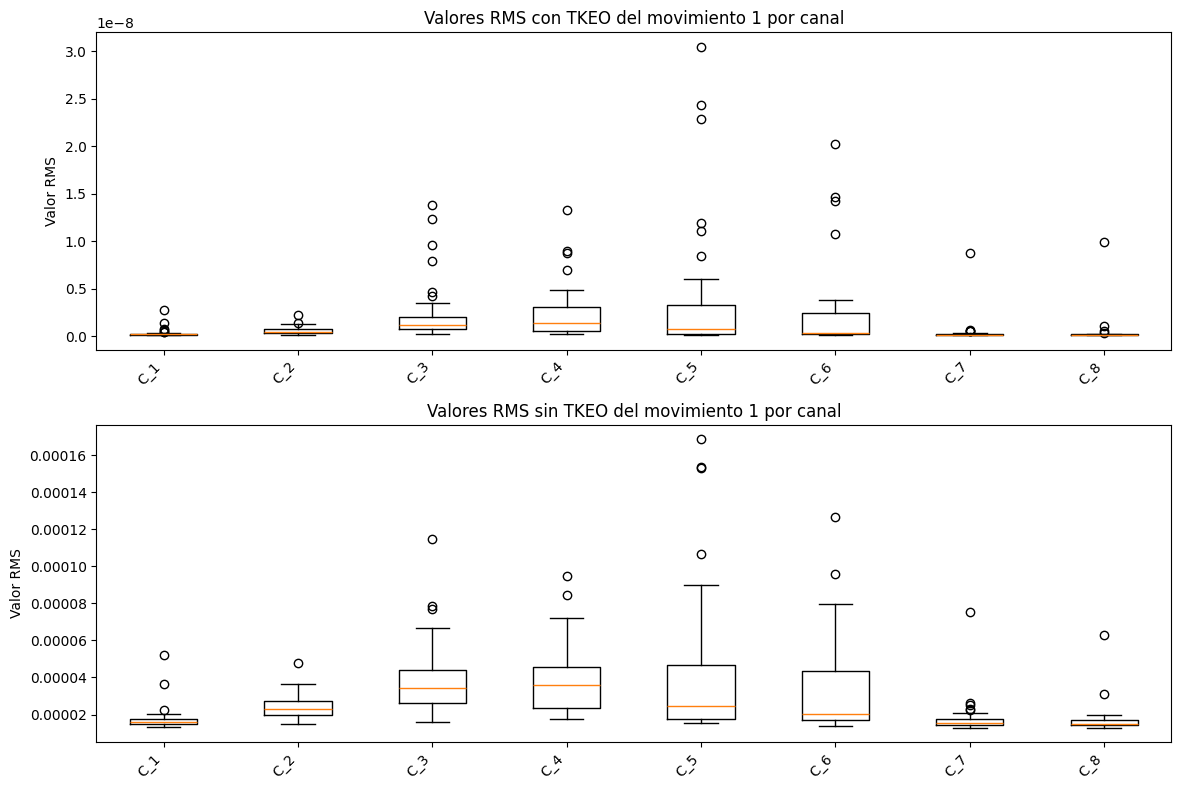

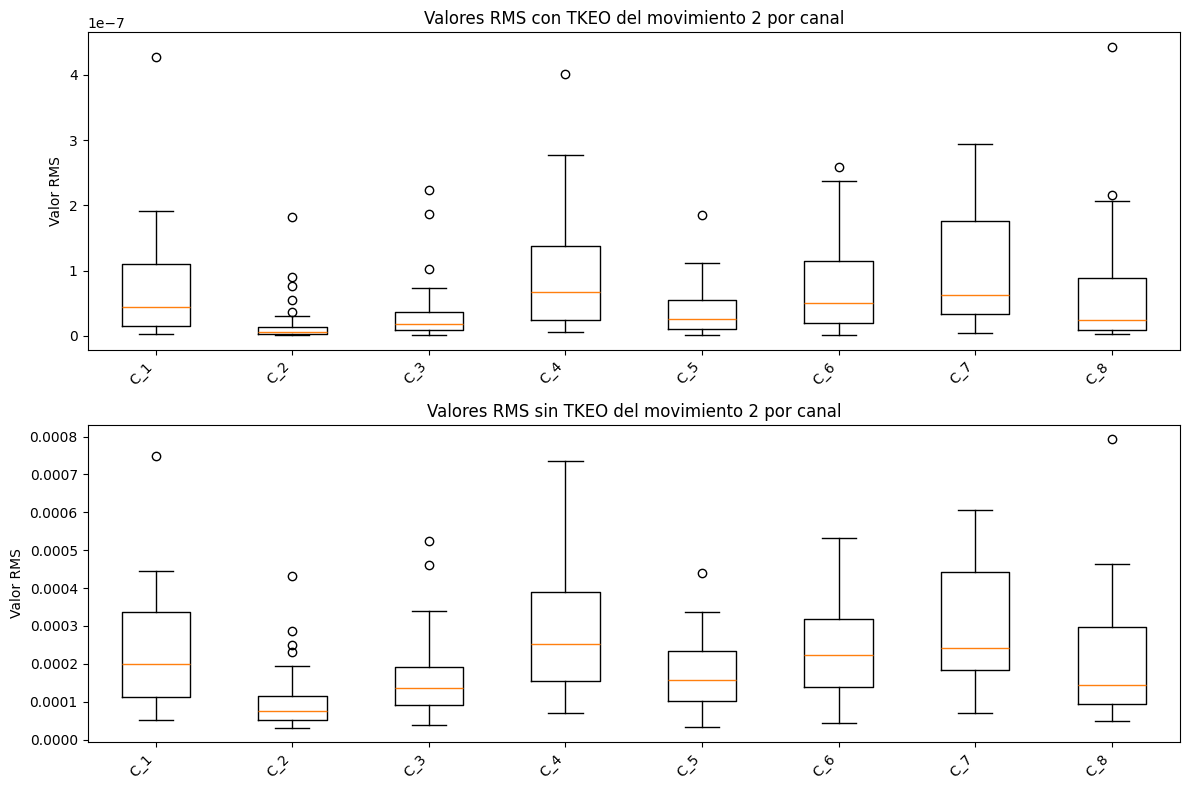

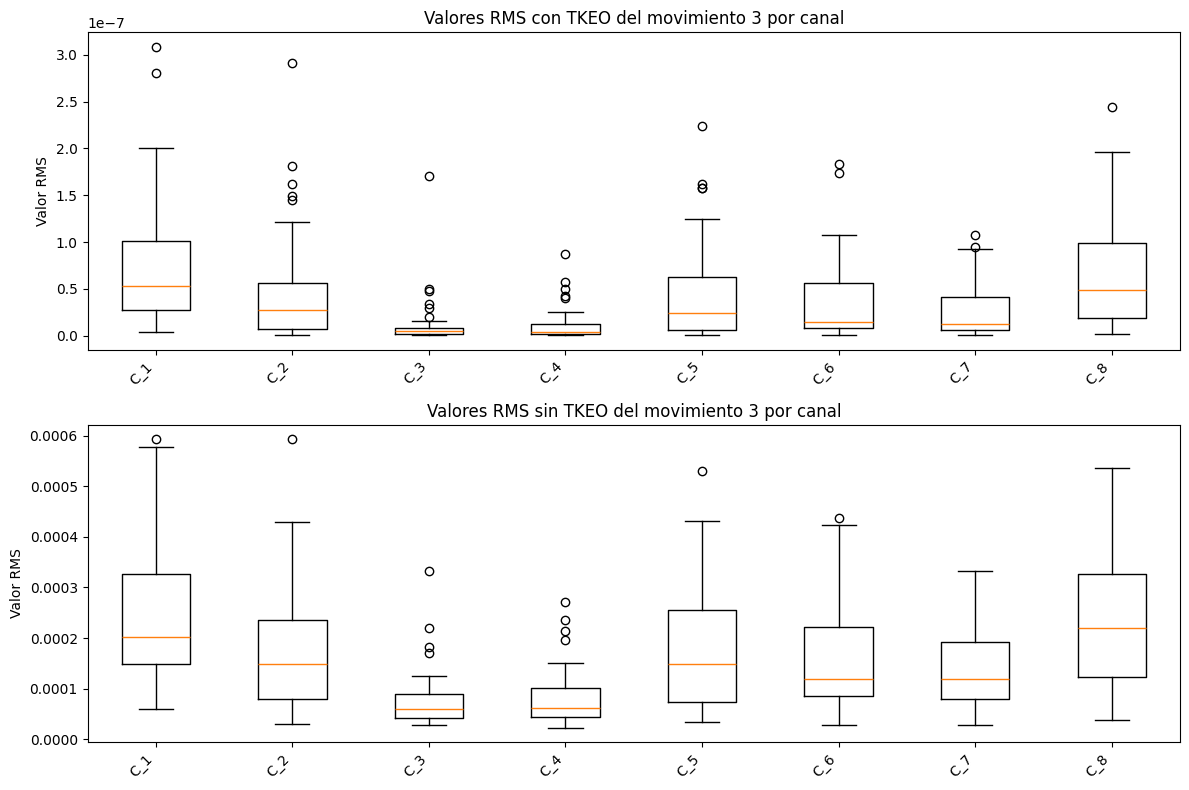

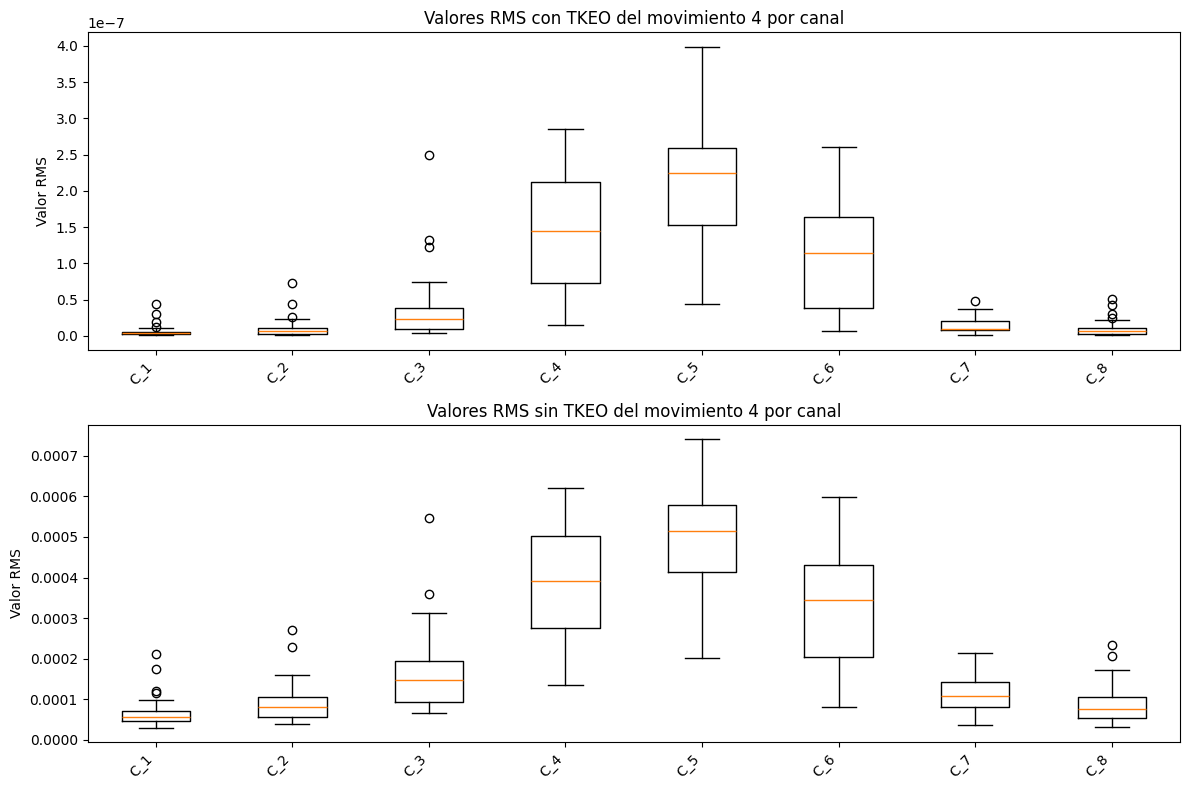

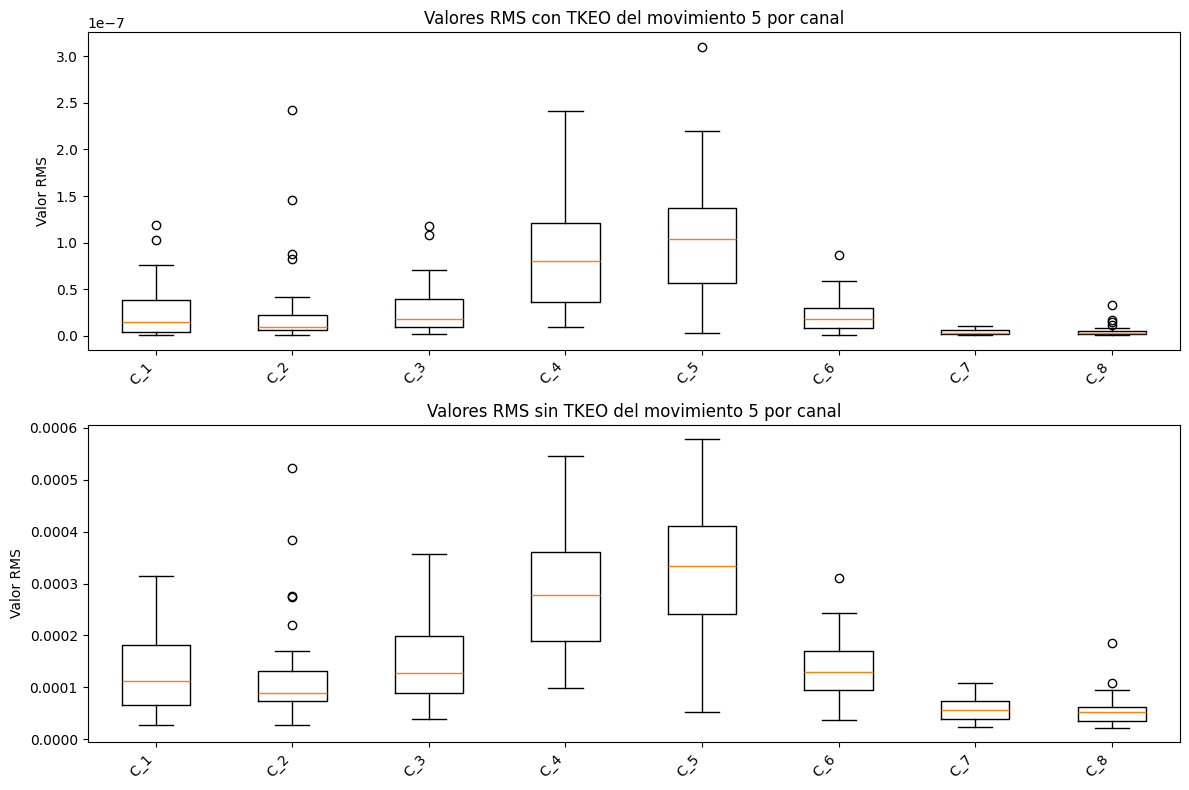

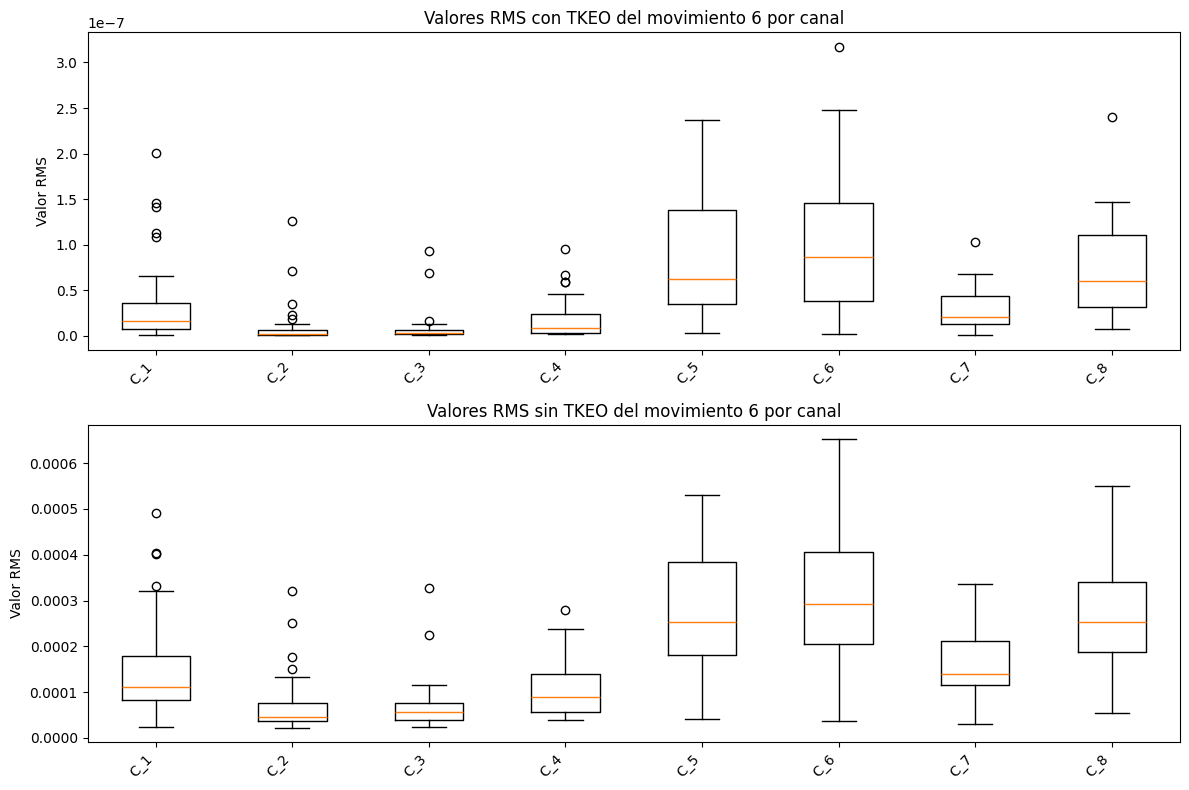

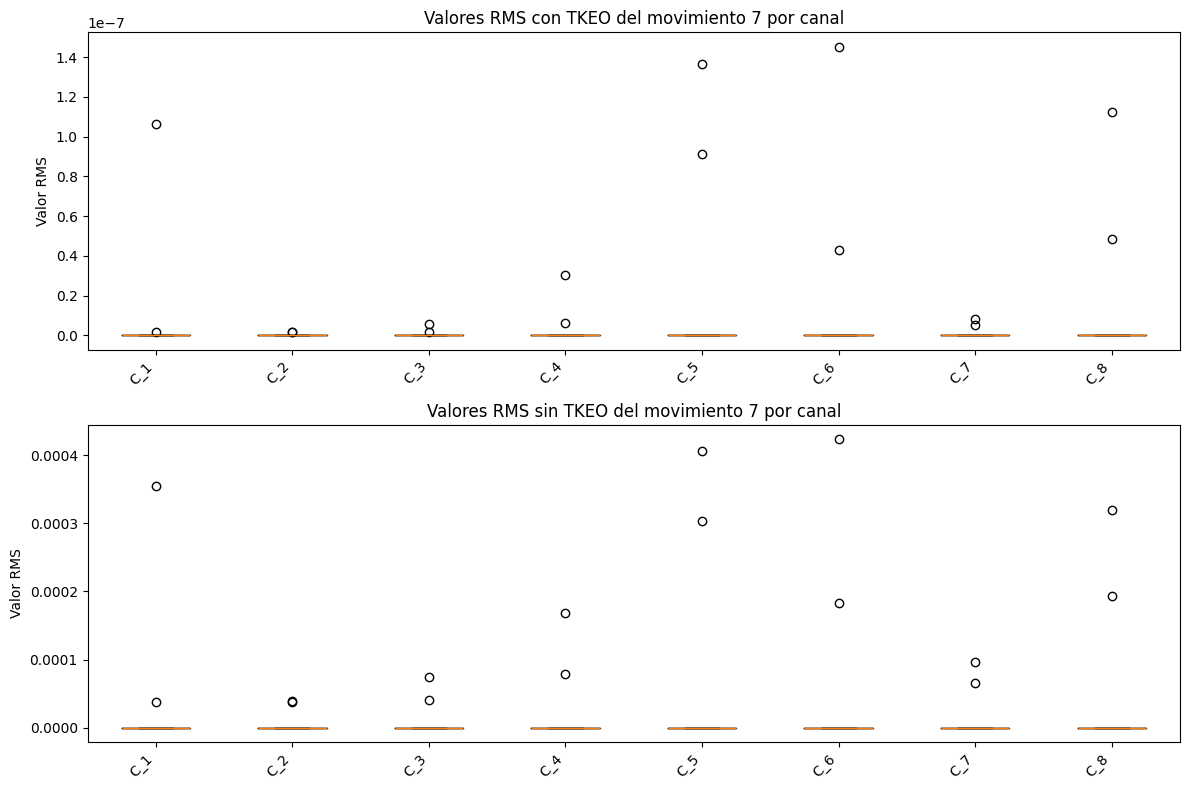

In [19]:
# Etiquetas de los canales
canales = [f'C_{i}' for i in range(1, 9)]

# Iterar sobre los 8 tipos de movimientos
for movimiento in range(1, 8):
    # Dataframe con valores de RMS con Tkeo del movimiento actual
    df_final_conTkeo_m = df_final_conTkeo[df_final_conTkeo['class'] == movimiento]

    # Dataframe con valores de RMS sin Tkeo del movimiento actual
    df_final_sinTkeo_m = df_final_sinTkeo[df_final_sinTkeo['class'] == movimiento]

    # Datos con Tkeo y sin Tkeo
    datos_contkeo = []
    datos_sintkeo = []

    # Iterar sobre los números del 1 al 8 (utilizando np.arange(1, 9))
    for i in np.arange(1, 9):
        # Obtener la lista de valores de la columna 'C_{i}RMS' del DataFrame df_final_conTkeo_m
        lista_RMS_contkeo = list(df_final_conTkeo_m[f'C_{i}RMS'])
        datos_contkeo.append(lista_RMS_contkeo)

        # Obtener la lista de valores de la columna 'C_{i}RMS' del DataFrame df_final_sinTkeo_m
        lista_RMS_sintkeo = list(df_final_sinTkeo_m[f'C_{i}RMS'])
        datos_sintkeo.append(lista_RMS_sintkeo)

    # Crear la figura y los subplots
    fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(12, 8))

    # Graficar los datos con Tkeo en el subplot superior
    ax1.boxplot(datos_contkeo)
    ax1.set_title(f'Valores RMS con TKEO del movimiento {movimiento} por canal')
    ax1.set_xticklabels(canales, rotation=45, ha='right')
    ax1.set_ylabel('Valor RMS')

    # Graficar los datos sin Tkeo en el subplot inferior
    ax2.boxplot(datos_sintkeo)
    ax2.set_title(f'Valores RMS sin TKEO del movimiento {movimiento} por canal')
    ax2.set_xticklabels(canales, rotation=45, ha='right')
    ax2.set_ylabel('Valor RMS')

    # Ajustar el espaciado entre subplots
    plt.subplots_adjust(hspace=0.5)

    # Mostrar la gráfica
    plt.tight_layout()
    plt.show()

En esta etapa, se generaron gráficos que representan los valores RMS de las señales de cada uno de los canales de los sujetos al realizar los distintos movimientos. Como primer paso, se decidió excluir el movimiento cero debido a que su falta de identificación dificultaba su clasificación y estudio. Del mismo modo, el movimiento 7 no fue considerado en los análisis debido a la insuficiencia de datos recolectados para permitir un estudio y comparación adecuados.

Estos gráficos resultaron ser significativamente esclarecedores en comparación con los anteriores, permitiendo observar, tanto con y sin la transformación TKEO, que esta transformación es equivalente en términos de conservación de la distribución en magnitud de los canales para cada uno de los movimientos. Sin embargo, se aprecia una mayor diferenciación entre los canales de menor magnitud y los de mayor magnitud en los datos transformados con TKEO. Esta transformación conlleva una reducción en la variabilidad de los datos y una menor diferencia entre el valor máximo y mínimo de los mismos, lo cual resulta beneficioso para los análisis estadísticos subsiguientes.

Es importante destacar que estos gráficos proporcionan información sobre la distribución de la energía del movimiento en cada uno de los canales, ofreciendo así un mapa de la detección de cada movimiento en los distintos canales. Esta perspectiva resulta crucial, ya que puede indicar la importancia relativa de cada canal para la detección de un movimiento específico. En este estudio, para la mayoría de los movimientos, se observa que los canales 4, 5 y 6 emergen como especialmente relevantes en la interpretación de los movimientos de la mano a través de señales EMG.

Para el estudio con las pruebas de hipótesis, se tomo uno de los movimientos como referencia para realizarlo, y de este se espera comparar si el valor RMS de los datos suministrados guarda corelación con los datos transformados a través de la función de TKEO

In [31]:
normalidad_datos(sujeto_mov3_sinTkeo)


,Canal,Valor p,Resultado
0,C_1RMS,2.092467e-02,"Rechazo H0, no distribuye normal"
1,C_2RMS,2.299927e-03,"Rechazo H0, no distribuye normal"
2,C_3RMS,5.411606e-07,"Rechazo H0, no distribuye normal"
3,C_4RMS,2.164931e-05,"Rechazo H0, no distribuye normal"
4,C_5RMS,1.868760e-03,"Rechazo H0, no distribuye normal"
5,C_6RMS,6.271073e-03,"Rechazo H0, no distribuye normal"
6,C_7RMS,2.476369e-02,"Rechazo H0, no distribuye normal"
7,C_8RMS,1.845988e-01,"Acepto H0, distribuye normal"


In [32]:
normalidad_datos(sujeto_mov3_conTkeo)


,Canal,Valor p,Resultado
0,C_1RMS,5.967925e-05,"Rechazo H0, no distribuye normal"
1,C_2RMS,1.875824e-06,"Rechazo H0, no distribuye normal"
2,C_3RMS,9.771360e-11,"Rechazo H0, no distribuye normal"
3,C_4RMS,5.017996e-08,"Rechazo H0, no distribuye normal"
4,C_5RMS,5.673658e-06,"Rechazo H0, no distribuye normal"
5,C_6RMS,1.106881e-06,"Rechazo H0, no distribuye normal"
6,C_7RMS,2.261992e-05,"Rechazo H0, no distribuye normal"
7,C_8RMS,6.376580e-04,"Rechazo H0, no distribuye normal"


Los resultados para la prueba Shapiro-Wilks arrojaron un *valor de p* menor al 0.05 para casi todos los canales de los datos con TKEO y sin TKEO indicando, que los canales del 1 al 7 no distribuyen normal, por lo cual no puede aplicarse de entrada una prueba paramétrica. Sin embargo, se procedió a realizar la prueba de homocedasticidad.

Para determinar si hay homocedasticidad entre los datos con TKEO y los originales, se empleó la Prueba de Levene con un intervalo de confianza de 95%. En esta, la hipótesis nula (***H0***) propone que los dos grupos de datos presentan varianza constante, mientras que la hipótesis alternativa (***H1***) propone que los dos grupos de datos no presentan varianza constante.

In [33]:
homocedasticidad_datos(sujeto_mov3_sinTkeo,sujeto_mov3_conTkeo)

,Canal,Valor p,Resultado
0,C_1RMS,46.019656,"Se acepta H0, hay homocedasticidad"
1,C_2RMS,43.413354,"Se acepta H0, hay homocedasticidad"
2,C_3RMS,17.941412,"Se acepta H0, hay homocedasticidad"
3,C_4RMS,26.040156,"Se acepta H0, hay homocedasticidad"
4,C_5RMS,47.367493,"Se acepta H0, hay homocedasticidad"
5,C_6RMS,43.791584,"Se acepta H0, hay homocedasticidad"
6,C_7RMS,66.674437,"Se acepta H0, hay homocedasticidad"
7,C_8RMS,71.189322,"Se acepta H0, hay homocedasticidad"


Finalmente, desde el experimento se asume que los datos son dependientes, ya que las transformaciones de las señales con la función TKEO depende directamente del valor de la función sin TKEO. Al no cumplirse los supuestos de las pruebas paramétricas, se les v aa aplicar una prueba no paramétrica, específicamente de medianas o de Mann-Whitney

In [37]:
prueba_MannW(sujeto_mov3_sinTkeo,sujeto_mov3_conTkeo)

,Canal,Valor p,Resultado
0,C_1RMS,3.046341e-13,"Se rechaza H0, la media es diferente."
1,C_2RMS,3.046341e-13,"Se rechaza H0, la media es diferente."
2,C_3RMS,3.046341e-13,"Se rechaza H0, la media es diferente."
3,C_4RMS,3.046341e-13,"Se rechaza H0, la media es diferente."
4,C_5RMS,3.046341e-13,"Se rechaza H0, la media es diferente."
5,C_6RMS,3.046341e-13,"Se rechaza H0, la media es diferente."
6,C_7RMS,3.046341e-13,"Se rechaza H0, la media es diferente."
7,C_8RMS,3.046341e-13,"Se rechaza H0, la media es diferente."


Por último, al aplicar la prueba no paramétrica, como ya se había mencionado antes en el informe, la transformación obtenida no es comparable con los datos originales, ya que se encuentran en magnitudes muy diferentes y sus medianas resultan estar muy distantes una de la otra. Por lo cual estos dos conjuntos de datos no se relacionan por sus medianas. 

## Conclusiones

Los gráficos de cajas y bigotes sugieren que realizar una transformación de las señales EMG con el operador TKEO (Teager-Kaiser Energy Operator) y comparar su resultado con una señal sin el operador, no es una medida de análisis comparativo efectiva pues la magnitud de los máximos entre las señales cambian de manera drástica y no son comparables. Dichos picos máximos se traducen en lecturas de mayor activación muscular para determinado movimiento, por lo cual se encuentra mayor validez en estudiar señales sólo con el operador TKEO el cual nos da una estimación de la energía instantánea de una señal y una maximización de valores de mayor actividad muscular, y comparar el rendimiento de cada uno de los canales en términos de captación de la intensidad de movimiento.

Aunque se encontraron estudios en los que la diferencia de la señal transformada y no transformada por el operador TKEO no era significativa, y por lo tanto se encontraban comparables y el TKEO un indicador relevante para el útil el análisis de señales electromiográficas, en el presente estudio no ocurrió lo mismo, lo cual puede estar sustentado en la no linealidad del operador TKEO junto con una población que sea demasiado pequeña para obtener resultados estadísticamente significativos, lo que podría indicar que se requiere un número mayor de participantes para obtener conclusiones más sólidas.                                              

Mediante la aplicación de la prueba Mann-Whitney, se encontró evidencia estadística suficiente para afirmar que las medianas de los datos de las señales con TKEO sin TKEO son significativamente diferentes para el movimiento 3. Esto reafirma que el análisis de EMG a través de transformación con operador TKEO puede ser un indicador efectivo para identificar la activación muscular en determinado movimiento entre señales con TKEO y sin este operador a pesar de que no se evidenciara en esta muestra específica.